In [2]:
import json
import matplotlib
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
from cycler import cycler
cm = plt.cm.tab10.colors
cycle = (cycler(color=cm) * cycler(linestyle=['-', '--', '-.']))
# for d in cycle:
#     print(d)
plt.rcParams['figure.figsize'] = [10, 10]
matplotlib.rcParams['figure.dpi'] = 300

100000
average 89.8673518


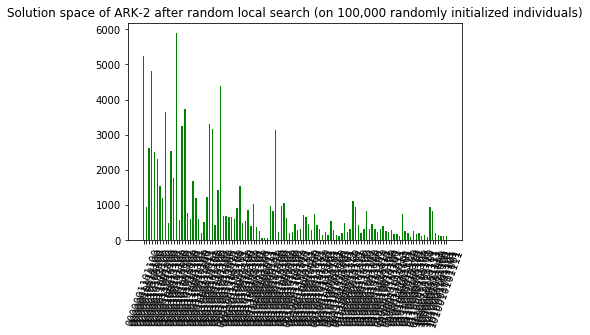

In [4]:
# Until 10000 absolute evaluations. Unique evaluations are also stored.
# Alphabet={0,1,2,3}.
filename = "../data/exp7/data_ark2_randomstart.json"

totalsum = 0
average = 0
total_entries = 100000

with open(filename) as json_file:
    rawdata = json.load(json_file)
    
#     print(rawdata["finalSolutionSpace"])
    
    myDictionary = rawdata["finalSolutionSpace"]
#     print(myDictionary)
    for item in myDictionary:
        totalsum = totalsum + myDictionary[item]
        model_file_string = "../ark2/model_" + item + ".json"
        model_file_string = model_file_string.replace("3", "")
        with open(model_file_string) as model_file:
            model_info = json.load(model_file)
            value = model_info["val_acc_ensemble"][4]
            percentage = myDictionary[item] / total_entries * 100
#             print(item, value, myDictionary[item], percentage)
            average = average + (myDictionary[item] / total_entries) * value
            
    width = 0.5
    plt.bar(myDictionary.keys(), myDictionary.values(), width, color='g')
    plt.xticks(rotation=70)
    plt.title("Solution space of ARK-2 after random local search (on 100,000 randomly initialized individuals)")
    
    print(totalsum)
    print("average", average)


# Fitness Analysis using schema theorem of ARK-2

In [266]:
import math
def encode(genotype, alphabetsize):
    result = 0
    for i, gene in enumerate(genotype):
        result += int(gene) * alphabetsize**(i)
    return result

def decode(encoding, alphabetsize, length):
    result = ""
    for i in range(length):
        sub = alphabetsize**(length - i - 1)
        layer = math.floor(encoding/sub)
        result = str(layer) + result
        encoding -= (layer * sub)
    return result

def removeIdentities(encoding, identityLayer):
    result = ""
    for s in encoding:
        if int(s) is not int(identityLayer):
            result += s
    return result

def highestEncoding(alphabetsize, length):
    genotype = ""
    for i in range(length):
        genotype += str(alphabetsize - 1)
    return encode(genotype, alphabetsize)

def addWildcard(genotype, length):
    for i in range(length - len(genotype)):
        genotype += "*"
    return genotype

def getFitness(fileprepend, encoding, alphabetsize, length, inclIdentity=True, lookupIndex=4):
    genotype = decode(encoding, alphabetsize, length)
    if inclIdentity:
        genotype = removeIdentities(genotype, str(alphabetsize-1))
    with open(fileprepend + genotype + ".json") as json_file:
        rawdata = json.load(json_file)
        fitness = rawdata['val_acc_ensemble'][lookupIndex]
        return fitness, genotype

In [426]:
def createHistogram (ax, alphabetsize, length, fileprepend, patterns, inclIdentity=True):
    fileappend = ".json"
    
    patternData = []
    for i in range(len(patterns) + 1):
        patternData.append([])

    for i in range(highestEncoding(alphabetsize, length) + 1):
        
        fitness, genotype = getFitness(fileprepend, i, alphabetsize, length, inclIdentity)
            
        added = False
        for j, p in enumerate(patterns):
            if(genotype[0:len(p)] == p):
                patternData[j + 1].append(fitness)
                added = True

        if not added:
            patternData[0].append(fitness)

    bins = np.linspace(0, 100, 100)

    for i in range(len(patterns)):
        patterns[i] = addWildcard(patterns[i], length)

    patterns.insert(0, "everything else")
    for i in range(len(patternData)):
        ax.hist(patternData[i], bins, alpha=0.8, label=patterns[i])

    ax.legend(loc='upper right')
    ax.set_xlabel("Fitness")
    ax.set_ylabel("Frequency")
#     ax.show()

Text(0.5, 0.98, 'Distribution of schemas on ARK-2 with identity layers and a length of at most 12')

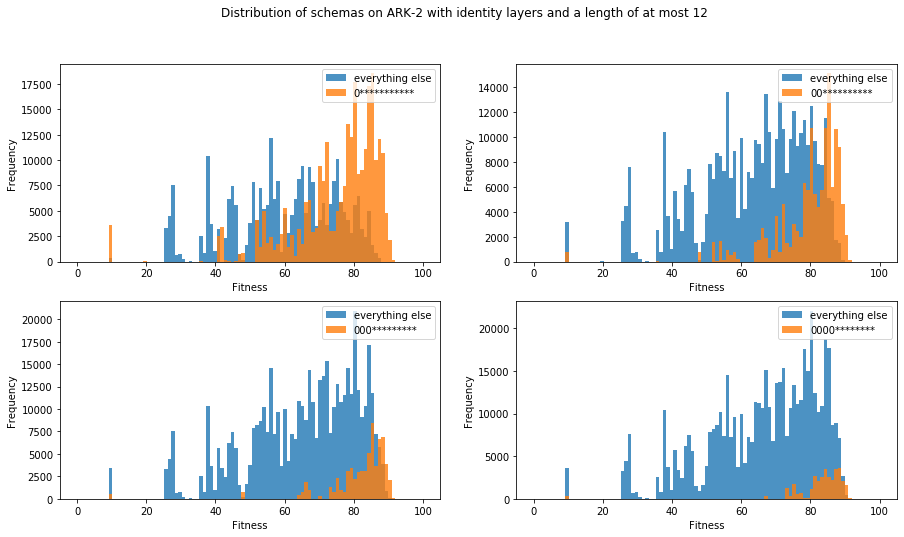

In [506]:
alphabetsize = 3
layers = 12
fig, axs = plt.subplots(2,2, figsize=(15,8))
createHistogram (axs[0,0], alphabetsize, layers, "../ark2/model_", ["0"])
createHistogram (axs[0,1], alphabetsize, layers, "../ark2/model_", ["00"])
createHistogram (axs[1,0], alphabetsize, layers, "../ark2/model_", ["000"])
createHistogram (axs[1,1], alphabetsize, layers, "../ark2/model_", ["0000"])
extrastring = ""
if alphabetsize is not 3:
    extrastring = "out"
fig.suptitle("Distribution of schemas on ARK-2 with" + extrastring + " identity layers and a length of at most " + str(layers))

Text(0.5, 0.98, 'Distribution of schemas on ARK-2 with identity layers and a length of at most 12')

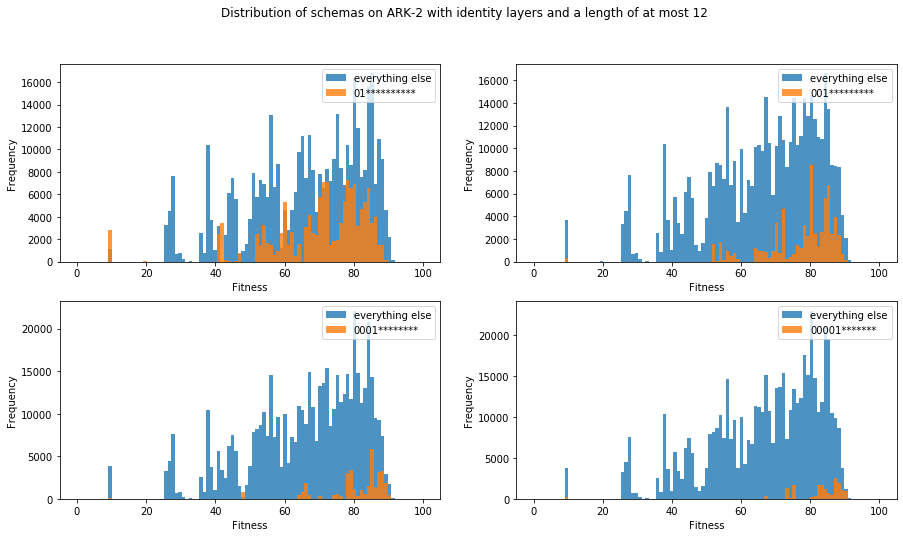

In [508]:
alphabetsize = 3
layers = 12
fig, axs = plt.subplots(2,2, figsize=(15,8))
createHistogram (axs[0,0], alphabetsize, layers, "../ark2/model_", ["01"])
createHistogram (axs[0,1], alphabetsize, layers, "../ark2/model_", ["001"])
createHistogram (axs[1,0], alphabetsize, layers, "../ark2/model_", ["0001"])
createHistogram (axs[1,1], alphabetsize, layers, "../ark2/model_", ["00001"])
extrastring = ""
if alphabetsize is not 3:
    extrastring = "out"
fig.suptitle("Distribution of schemas on ARK-2 with" + extrastring + " identity layers and a length of at most " + str(layers))

Text(0.5, 0.98, 'Distribution of schemas on ARK-2 with identity layers and a length of at most 12')

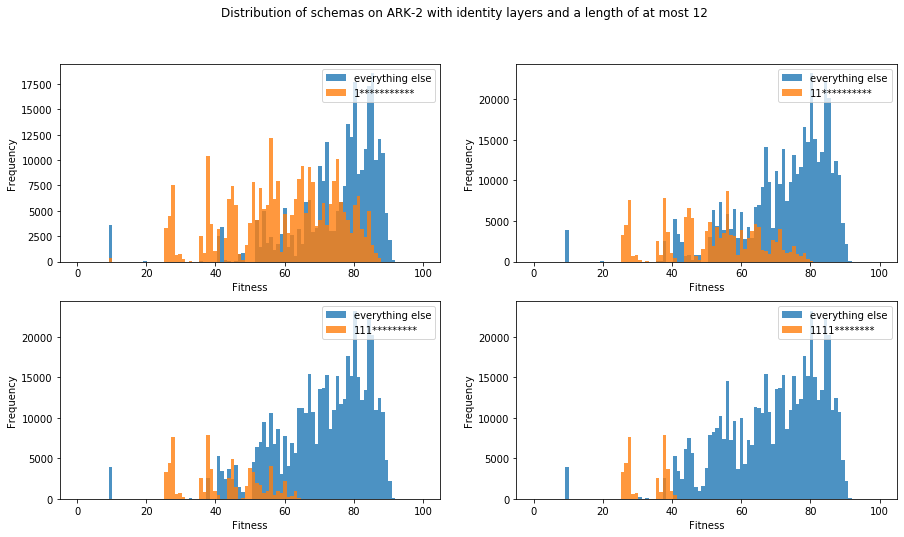

In [509]:
alphabetsize = 3
layers = 12
fig, axs = plt.subplots(2,2, figsize=(15,8))
createHistogram (axs[0,0], alphabetsize, layers, "../ark2/model_", ["1"])
createHistogram (axs[0,1], alphabetsize, layers, "../ark2/model_", ["11"])
createHistogram (axs[1,0], alphabetsize, layers, "../ark2/model_", ["111"])
createHistogram (axs[1,1], alphabetsize, layers, "../ark2/model_", ["1111"])
extrastring = ""
if alphabetsize is not 3:
    extrastring = "out"
fig.suptitle("Distribution of schemas on ARK-2 with" + extrastring + " identity layers and a length of at most " + str(layers))

# Analysis on top 10 percent performing networks

In [451]:
def getTopXPercent(alphabetsize=3, inclIdentity=True, length=10, bestTopPercent=10):
    fileprepend = "../ark2/model_"

    dictionary = {}
    optimum = 0;

    for i in range(highestEncoding(alphabetsize, length) + 1):
        fitness, genotype = getFitness(fileprepend, i, alphabetsize, length, inclIdentity)
        dictionary[i] = fitness
        optimum = max(optimum, fitness)


    dictvalues = np.array(list(dictionary.values()))
    dictkeys = np.array(list(dictionary.keys()))

    sortedArray = np.argsort(dictvalues)
    sorteddictkeys = dictkeys[sortedArray]

    arraylength = len(sortedArray)
    last10 = sortedArray[arraylength - int(arraylength/(100/bestTopPercent)):]

    bestgenotypes = []
    for i in last10:
        bestgenotypes.append(decode(i, alphabetsize, length))
    return bestgenotypes

In [503]:
def frequencyAnalysis(genotypes):
    alphabet = 3;
    length = len(genotypes[0])
    frequencies = np.zeros((alphabet, length))
    for genotype in genotypes:
        for i, gene in enumerate(genotype):
            frequencies[int(gene), i] += 1
    if sum(frequencies[2,:]) == 0: 
        frequencies = frequencies[0:2,:]
    return frequencies
    
def printFrequencyTable(frequencies):
    result = ""
#     print(findMaxStringLength(frequencies))
#     result += "Frequencies of genes\n"
    for i, row in enumerate(frequencies):
        result += str(i) + ":"
        for item in row:
            result += " " + padWithSpaces("% 5d" % item, 7)
        result += "\n"
    print(result)
    
def printFrequencyTablePercentages(frequencies):
    result = ""
#     result += "Frequency percentages of genes\n"
    total = sum(frequencies[:,0])
    for i, row in enumerate(frequencies):
        result += str(i) + ":"
        for item in row:
            result += " " + padWithSpaces("% .1f" % (item/total*100), 7)
        result += "\n"
    print(result)
    
# def findMaxStringLength(strings):
#     maxStringLength = 0
#     for s in sum(strings, []):
#         maxStringLength = max(maxStringLength, len(str(s)))
#         print(s, len(str(s)))
#     return maxStringLength
    
def padWithSpaces(string, length):
    stringlength = len(string)
    for i in range(length-stringlength):
        string = " " + string
    return string

In [505]:
for alphabetsize in [(2, False), (3, True)]:
    for layerlength in range(7,13):
        print("------------------------------------")
        print("Alphabetsize=" + str(alphabetsize[0]) + " and Layers=" + str(layerlength) + "\n")
        bestgenotypes = getTopXPercent(alphabetsize=alphabetsize[0], inclIdentity=alphabetsize[1], length=layerlength, bestTopPercent=10)
        frequencies = frequencyAnalysis(bestgenotypes)
        printFrequencyTable(frequencies)
        printFrequencyTablePercentages(frequencies)

------------------------------------
Alphabetsize=2 and Layers=7

0:      12      10       8       8       9       9      10
1:       0       2       4       4       3       3       2

0:   100.0    83.3    66.7    66.7    75.0    75.0    83.3
1:     0.0    16.7    33.3    33.3    25.0    25.0    16.7

------------------------------------
Alphabetsize=2 and Layers=8

0:      25      20      19      19      18      18      18      20
1:       0       5       6       6       7       7       7       5

0:   100.0    80.0    76.0    76.0    72.0    72.0    72.0    80.0
1:     0.0    20.0    24.0    24.0    28.0    28.0    28.0    20.0

------------------------------------
Alphabetsize=2 and Layers=9

0:      51      43      38      37      34      33      35      36      37
1:       0       8      13      14      17      18      16      15      14

0:   100.0    84.3    74.5    72.5    66.7    64.7    68.6    70.6    72.5
1:     0.0    15.7    25.5    27.5    33.3    35.3    31.4    29.4  